# HOG-LBP SVM

## Importing dataset

In [1]:

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

## Extracting features

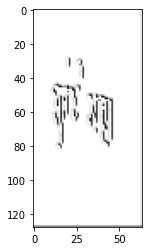

In [13]:
dir='C:\\Users\\vishnu\\Desktop\\Data_science\\ML\\BHSig260'

def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value
   
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val


categories=['Bengali','Hindi']

data=[]

for category in categories:
    path1=os.path.join(dir,category)
    label=categories.index(category)
    
    for fol in os.listdir(path1):
        path2=os.path.join(path1,fol)
        for img in os.listdir(path2):
            imgpath=os.path.join(path2,img)
            langimage=cv2.imread(imgpath,1)
            try:
                langimage=cv2.resize(langimage,(64,128))
                height, width, _ = langimage.shape
                img_gray = cv2.cvtColor(langimage,
                                        cv2.COLOR_BGR2GRAY)
                img_lbp = np.zeros((height, width),
                                    np.uint8)
                for i in range(0, height):
                    for j in range(0, width):
                        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
                featurelbp=np.array(img_lbp).flatten()
                fd=hog(langimage,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=False, multichannel=True)
                featurehog=np.array(fd).flatten()
                data.append([featurehog,featurelbp,label])
                break
            except Exception as e:
                pass
plt.imshow(img_lbp,cmap='gray')
plt.show()

## Storing these features

In [3]:
pick_in=open('final.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

## Seperating the feature for hog and lbp models

In [2]:
import random

pick=open('final.pickle','rb')
data=pickle.load(pick)
pick.close()
featureshog=[]
labelshog=[]
featureslbp=[]
labelslbp=[]
combinedfeatures=[]
combinedlabels=[]
random.shuffle(data)
print(len(data))

for featurehog,featurelbp,label in data:
    featureshog.append(featurehog)
    labelshog.append(label)
    featureslbp.append(featurelbp)
    labelslbp.append(label)
    b=np.hstack((featurehog,featurelbp))
    combinedfeatures.append(b)
    combinedlabels.append(label)

14040


## Splitting the data

In [3]:
xhtrain,xhtest,yhtrain,yhtest=train_test_split(featureshog,labelshog,test_size=0.30,random_state=0)

In [4]:
xltrain,xltest,yltrain,yltest=train_test_split(featureslbp,labelslbp,test_size=0.30,random_state=0)

In [5]:
xctrain,xctest,yctrain,yctest=train_test_split(combinedfeatures,combinedlabels,test_size=0.30,random_state=0)

## Hog model

In [10]:
modelhog=SVC(C=0.1,kernel='poly',gamma=1,probability=True)
modelhog.fit(xhtrain,yhtrain)

SVC(C=0.1, gamma=1, kernel='poly', probability=True)

In [11]:
predictionhog=modelhog.predict(xhtest)
accuracyhog=modelhog.score(xhtest,yhtest)

categories=['Bengali','Hindi']

print('Accuracy: ',accuracyhog)
print('Prediction is :',categories[predictionhog[0]])
print(classification_report(yhtest, predictionhog))

Accuracy:  0.9472934472934473
Prediction is : Bengali
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       557
           1       0.94      0.97      0.96       847

    accuracy                           0.95      1404
   macro avg       0.95      0.94      0.94      1404
weighted avg       0.95      0.95      0.95      1404



## Lbp model

In [8]:
modellbp=SVC(C=0.1,kernel='poly',gamma='auto',probability=True)
modellbp.fit(xltrain,yltrain)

SVC(C=0.1, gamma='auto', kernel='poly', probability=True)

In [9]:
predictionlbp=model.predict(xltest)
accuracylbp=model.score(xltest,yltest)

categories=['Bengali','Hindi']

print('Accuracy: ',accuracylbp)
print('Prediction is :',categories[predictionlbp[0]])
print(classification_report(yltest, predictionlbp))

Accuracy:  0.6227445394112061
Prediction is : Hindi
              precision    recall  f1-score   support

           0       0.49      0.31      0.38      1573
           1       0.66      0.81      0.73      2639

    accuracy                           0.62      4212
   macro avg       0.58      0.56      0.56      4212
weighted avg       0.60      0.62      0.60      4212



## hog-lbp combined through concatenation

In [95]:
#we do scaling to make sure they take values int the same scale to prevent one feature to dominate the other which would be neglected and therefore undermine our model
#it is mean and standard deviation of all the values of the available set so y train or test set is future data so not to touched with new observations use the same scaler model on x_test to get same transformation like x_train
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#we dont have to apply for the dummy variables as they are already btw -3 to +3 and we'll loose the interpretation as it acts as labels
xctrain=sc.fit_transform(xctrain)
#fit method will compute mean and sd and transform will transform the features with standardisation
xctest=sc.transform(xctest)
model=SVC(C=0.01,kernel='poly',gamma=1)
model.fit(xctrain,yctrain)
prediction=model.predict(xctest)
accuracy=model.score(xctest,yctest)

categories=['Bengali','Hindi']

print('Accuracy: ',accuracy)
print('Prediction is :',categories[prediction[0]])
print(classification_report(yctest, prediction))

Accuracy:  0.8513770180436847
Prediction is : Hindi
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1628
           1       0.83      0.95      0.89      2584

    accuracy                           0.85      4212
   macro avg       0.87      0.82      0.83      4212
weighted avg       0.86      0.85      0.85      4212



## Storing the models

In [36]:
pick=open('finallbp.sav','wb')
pickle.dump(modellbp,pick)
pick.close()

In [8]:
pick=open('lbp_model1.sav','rb')
model=pickle.load(pick)
pick.close()

In [37]:
pick=open('finalhog.sav','wb')
pickle.dump(modelhog,pick)
pick.close()

In [63]:
pick=open('finalhog.sav','rb')
modelhog=pickle.load(pick)
pick.close()

In [53]:
pick=open('finalhoglbp.sav','wb')
pickle.dump(model,pick)
pick.close()

In [ ]:
pick=open('finalhoglbp.sav','rb')
model=pickle.load(pick)
pick.close()

## Mean of predictions Hog+Lbp

In [12]:
predhog=modelhog.predict_proba(xhtest)
predlbp=modellbp.predict_proba(xltest)
finalprob=(predhog+predlbp)/2
print(len(finalprob),len(predhog))

1404 1404


In [80]:
finalpred=[]
for i in range(len(finalprob)):
    if(finalprob[i][0]>finalprob[i][1]):
        finalpred.append(0)
    else:
        finalpred.append(1)

print(classification_report(yltest,finalpred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1628
           1       0.93      0.96      0.95      2584

    accuracy                           0.93      4212
   macro avg       0.93      0.92      0.93      4212
weighted avg       0.93      0.93      0.93      4212



In [96]:
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yhtest,finalpred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(yhtest,finalpred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(yhtest,finalpred))
y_true=yhtest
y_pred=finalpred
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print("Confusion matrix")
print("By definition a confusion matrix C  is such that C(i,j)  is equal to the number of observations known to be in group i and predicted to be in group j.")
print(metrics.confusion_matrix(y_true,y_pred, labels=[0,1]))

Accuracy: 0.9323361823361823
Precision: 0.9316560270371761
Recall: 0.9601393188854489
Confusion matrix
By definition a confusion matrix C  is such that C(i,j)  is equal to the number of observations known to be in group i and predicted to be in group j.
[[1446  182]
 [ 103 2481]]


# Rough Start

In [58]:
predictfinal=[]

for i in range(len(xltest)):
    n=modellbp.score([xltest[i]],[yltest[i]])
    m=modelhog.score([xhtest[i]],[yhtest[i]])
    if m >= n:
        z=modelhog.predict([xhtest[i]])
        predictfinal.append(z[0])
    else:
        y=modellbp.predict([xltest[i]])
        predictfinal.append(y[0])

print(classification_report(yltest, predictfinal))
   

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1628
           1       0.99      1.00      0.99      2584

    accuracy                           0.99      4212
   macro avg       0.99      0.99      0.99      4212
weighted avg       0.99      0.99      0.99      4212



## Verification of model accuracy that when score is zero means it is predicting wrong

In [31]:
count=0
for i in range(len(yhtest)):
    if modelhog.score([xhtest[i]],[yhtest[i]])==0:
        count=count+1
        if(count<10):
            print(yhtest[i],' ',modelhog.predict([xhtest[i]]))

print((1-(count/len(yhtest)))*100)

0   [1]
0   [1]
1   [0]
0   [1]
0   [1]
0   [1]
1   [0]
1   [0]
0   [1]
93.85090218423552


## Rough

In [26]:
z=modellbp.predict([xltest[0]])
z[0]

0

In [27]:
modelhog.score([xhtest[0]],[yhtest[0]])

1.0

In [ ]:
predictionlbp

In [ ]:
print(len(predictionlbp))

In [ ]:
xltest[0]

In [ ]:
xhtest[0]

In [69]:
finalpred[0][0]

0.15693072153961093

In [91]:
print(predhog[1],predlbp[1])

[0.3741145 0.6258855] [0.40545487 0.59454513]


In [93]:
print(finalprob[1],finalpred[1])

[0.38978469 0.61021531] 1


(8192,)
[[0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [1.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [1.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [1.000e+00]
 [3.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [1.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [6.000e+00]
 [7.000e+00]
 [0.000e+00]
 [0.000e+00]
 [2.000e+00]
 [1.000e+00]
 [0.000e+00]
 [0.000e+00]
 [2.000e+00]
 [1.000e+00]
 [1.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [1.000e+00]
 [1.000e+00]
 [0.000e+00]
 [1.000e+00]
 [1.000e+00]
 [3.000e+00]
 [1.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [2.000e+00]
 [0.000e+00]
 [3.000e+00]
 [0.000e+00]
 [6.000e+00]
 [3.000e+00]
 [7.200e+01]
 [2.000e+01]
 [0.000e+00]
 [0.000e+00]
 [1.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.

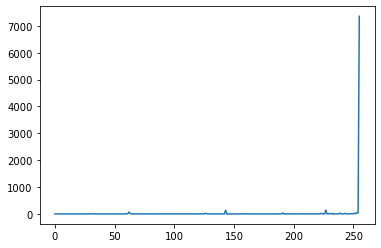

In [8]:
print(featureslbp[1].shape)
histr = cv2.calcHist([featureslbp[0]],[0],None,[256],[0,256])
print(histr)
plt.plot(histr)
plt.show()

## Rough end